# Credit Default Risk
## Juan Pablo Veliz - Proyecto DS - Coderhouse 

### Entendimiento del Negocio

#### Abstract
Nos referimos como industria de servicios financieros a la amplia oferta de productos y servicios relacionados con la administración del dinero y sus actividades relacionadas, como seguros, procesamiento de pagos, banca digital y préstamos.
Hay muchas partes interesadas que compiten dentro de la industria, incluidos los emisores de tarjetas de crédito, los bancos tradicionales y, más recientemente, varias empresas nuevas generalmente englobadas bajo el nombre de "fintech", que brindan servicios financieros con un enfoque tecnológico muy fuerte. Estos recién llegados han acelerado la tendencia digitalizadora de la industria, que se adapta mejor a las nuevas preferencias de los consumidores, en particular de los jóvenes a los que les gusta administrar sus finanzas desde casa. En este escenario, todas las instituciones financieras y las empresas emergentes están perfeccionando su tecnología y ampliando los servicios remotos.

Hay tres tipos de servicios financieros: personales, de consumo y corporativos. En este proyecto estaremos enfocando nuestra atención en las finanzas de consumo y especialmente en la industria del crédito.
Las finanzas de consumo están presentes en casi todas las decisiones económicas que las personas toman en su vida, como comprar un automóvil o una casa, pagar la universidad o hacer un viaje en vacaciones. Todas estas experiencias por lo general requieren un gran gasto que se puede acomodar a un conveniente flujo de efectivo en cuotas a lo largo del tiempo tomando préstamos.
En el otro lado de la mesa, los prestamistas se arriesgan en cada operación, ya que incurren en pérdidas cuando los clientes no devuelven sus préstamos a tiempo. Desde su punto de vista, el riesgo es deseable porque es representativo de una oportunidad de ganancia que se captura en la tasa de interés, pero demasiado riesgo podría conducir a mayores índices de incumplimiento generando pérdidas masivas y potencialmente la quiebra.
Es por eso que la predicción de incumplimiento crediticio es fundamental para administrar el riesgo en un negocio de préstamos al consumidor, ya que permite a los prestamistas optimizar las decisiones de préstamo y crear una mejor experiencia para el cliente.

En este proyecto, utilizaré un conjunto de datos creado con fines educativos por MachineHack, que contiene 67.463 filas y 35 columnas de datos, incluidos atributos como el monto financiado, el historial crediticio de los prestatarios y el tipo de préstamo, para predecir si una persona será morosa o no.

#### Problemática del Negocio y Enfoque

El conjunto de datos seleccionado simula datos históricos para un "P2P Lending Club". También conocido como crowdlending, P2P es la práctica de personas o empresas no relacionadas que prestan dinero a través de servicios en línea que conectan a los prestamistas con los prestatarios.
Los mercados de préstamos P2P han crecido exponencialmente en los últimos años, por lo que hay espacio para motores de recomendación capaces de mostrar las mejores opciones tanto para inversores como para prestatarios.

Como se comentó anteriormente, estaré trabajando en la hipótesis de que es posible predecir si un préstamo caerá en mora utilizando antecedentes e información financiera histórica sobre el tomador del préstamo y las condiciones del préstamo.

En el camino, podremos encontrar ideas para algunas preguntas relevantes del tema, tales como: ¿Cuánto influye el comportamiento financiero pasado en el futuro? ¿Cuál es el/los atributo/s del consumidor más relevante a considerar en la gestión de riesgos? ¿Qué tipo de préstamo es más riesgoso? ¿Existe alguna condición particular que tenga mayor relevancia en la morosidad de los préstamos?

### Entendimiento de los Datos

#### Importación de Librerías y Definición del Dataset Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
df = pd.read_csv("https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Dataset/train.csv?raw=true")

C:\Users\veliz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Descripción de los Datos

Se provee una descripción de los datos crudos en el siguiente reporte: [Raw Profiling](https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Dataset/profiling-raw.html)

In [18]:
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='profiling-raw.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 167.22it/s]


A continuación se detalla la información contenida en el dataset: 

0. Loan ID
1. Loan Amount: Monto del préstamo solicitado.
2. Funded Amount: Monto del préstamo menos cargos prepagos.
3. Funded Amount Investor: en los préstamos P2P, el monto total ofrecido por todos los inversores.
4. Term: Cantidad de tiempo para pagar el préstamo.
5. Batch Enrolled: ID del grupo en el que se registró el préstamo.
6. Interest Rate: Tasa de interés aplicado al préstamo.
7. Grade: Clasificación sociodemográfica, donde A se refiere a mayores ingresos.
8. Sub Grade: Sub-clasificación de Grado (generalmente Grado final ajustado por monto de préstamo y vencimiento de acuerdo a las reglas del mercado P2P).
9. Employment Duration: se refiere a la experiencia laboral del prestatario en el tiempo. (Los datos están errados, los valores en esta columna se refieren en realidad a "Home Ownership").
10. Home Ownership: Tipo de tenencia de la vivienda. (Los datos en el conjunto de datos original no son correctos y probablemente se refieren al Valor de la vivienda).
11. Verification Status: Indica si la información del prestatario ha sido verificada.
12. Payment Plan: Se refiere al acto de hacer pagos iguales de una cantidad predefinida en una frecuencia predefinida. (Faltan datos).
13. Loan Title: Describe el propósito del préstamo.
14. Debit to Income: Razón = monto de pagos de deuda comprometida / ingreso.
15. Delinquency - two years: Veces que el prestatario ha dejado de pagar su deuda a tiempo en los últimos 2 años.
16. Inquires - six months: Veces que el prestatario ha sido consultado (buscado) en una base de datos financiera pública.
17. Open Account: Número de líneas de crédito abiertas en el expediente crediticio del prestatario.
18. Public Record: Número de morosidades por las cuales se han emprendido acciones judiciales por parte de un acreedor.
19. Revolving Balance: La cantidad que el titular de la cuenta toma prestada contra una línea de crédito
20. Revolving Utilities: Razón = Saldo Revolvente / Línea de Crédito Total. No aplicable a préstamos a plazos.
21. Total Accounts: Número total de Cuentas en el expediente de crédito del acreditado.
22. Initial List Status: IIndica si el préstamo debe ser fondeado en su totalidad (w) o permite ser fondeado parcialmente (f) por los inversionistas.
23. Total Received Interest: Cantidad de intereses que se ha pagado por el préstamo actual.
24. Total Received Late Fee: Cantidad de cargos por pago atrasado que se ha pagado por el préstamo actual.
25. Recoveries: Cantidad que ha sido cobrada con servicios de cobranza de terceros.
26. Collection Recovery Fee: Tarifas aplicadas a las recuperaciones.
27. Collection 12 months Medical: Indica si algún solicitante tiene facturas médicas impagas por al menos 12 meses.
28. Application Type: Indica si la solicitud es individual (1 solicitante) o conjunta (2 o más solicitantes).
29. Last week Pay: Monto del pago del préstamo realizado durante la última semana.
30. Accounts Delinquent: Número de cuentas morosas en el expediente crediticio del prestatario. (Todas las filas en el conjunto de datos contienen 0, probablemente faltan datos).
31. Total Collection Amount: La acumulación de créditos adeudados por el prestatario.
32. Total Current Balance: el monto actual de todos los cargos, incluidas las tarifas, los intereses, las multas y los créditos.
33. Total Revolving Credit Limit: Límite de línea de crédito asignado.
34. Loan Status: Indica si el préstamo está mora.

#### Preparación de los datos

De acuerdo a los hallazgos analizando la estructura, procederé a realizar las siguientes transformaciones:
* Cambiar el nombre de las columnas a sus nombres correctos
* Descartar columnas con datos faltantes/inútiles
* Reducción de la cardinalidad en la columna "Loan Title"

Un nuevo análisis de los datos preprocesados puede encontrarse en este reporte: [Pre Processed Profiling](https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Dataset/profiling-pre.html)


In [2]:

df.rename(columns={"Home Ownership": "Home Value", "Employment Duration": "Home Ownership"}, inplace=True)

df.drop(["Payment Plan", "Accounts Delinquent", "Batch Enrolled"], inplace=True, axis=1)

titles = ["Consolidation", "Refinancing"]
df.loc[df["Loan Title"].str.contains(titles[0], case=False), "Loan Title"] = titles[0]
df.loc[df["Loan Title"].str.contains(titles[1], case=False), "Loan Title"] = titles[1]
df.loc[~df["Loan Title"].str.contains('|'.join(titles), case=False), "Loan Title"] = "Other"


In [ ]:

prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='profiling-pre.html')

#### Exploración de Datos

Luego de la limpieza inicial, comencemos la fase de exploración de los datos

Trazando la matriz de correlación como un heatmap, podemos ver que no hay correlaciones significativas entre los atributos numéricos. Luego echemos un vistazo a algunas variables relevantes del problema.

<AxesSubplot:>

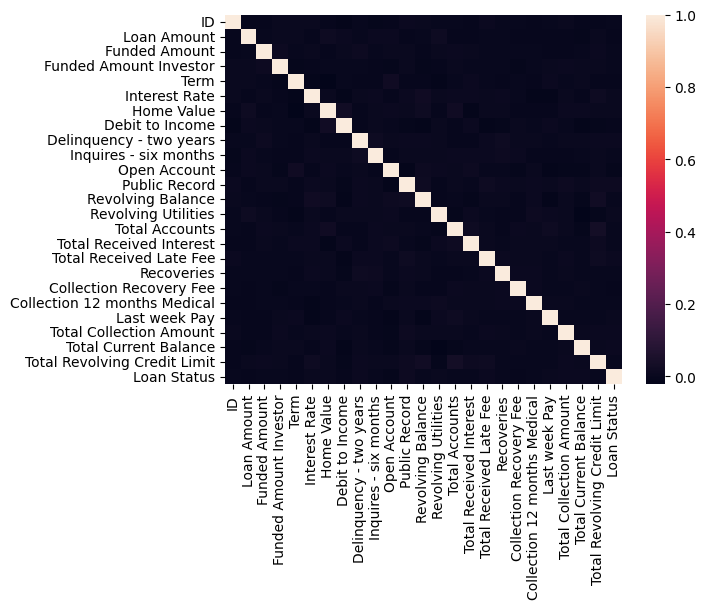

In [10]:

sns.heatmap(df.corr(), xticklabels=df.select_dtypes(include= ["float", "int"]).columns, yticklabels=df.select_dtypes(include= ["float", "int"]).columns)

1. Loan Amount. El histograma muestra que tiene una distribución con 1 modo y otros 3 modos relativos. Podemos ver en el boxplot que las cantidades más comunes están entre 10.000 y 23.000, alrededor de la mediana de aprox. 16.000.
Al observar los diagramas de violín de los montos para cada estado de préstamo, vemos que los préstamos en mora dibujan una figura con curvas ligeramente más suaves, lo que significa que la distribución es muy similar, aunque no exactamente igual.

[Text(0.5, 1.0, 'Violin Plot / Status')]

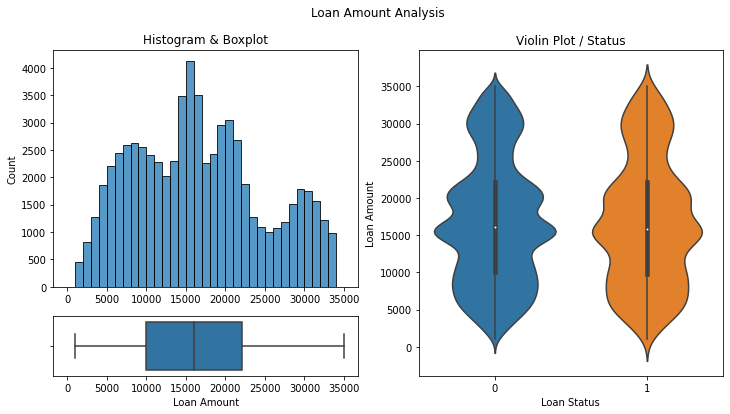

In [48]:
fig, axs = plt.subplot_mosaic("AC;BC", gridspec_kw=dict(height_ratios=[4,1]), figsize=(12,6))

fig.suptitle("Loan Amount Analysis")

sns.histplot(x=df["Loan Amount"], bins=range(0,35000, 1000), ax=axs["A"]).set(title="Histogram & Boxplot", xlabel=None)

sns.boxplot(x=df["Loan Amount"], ax=axs["B"])
axs["B"].get_shared_x_axes().join(axs["A"], axs["B"])

sns.violinplot(x=df["Loan Status"], y=df["Loan Amount"], ax=axs["C"]).set(title="Violin Plot / Status")


2. Interest Rate. El histograma muestra una distribución con 1 modo relativo y cola derecha larga. Siguiendo el diagrama de caja indica que las tasas superiores al 22 % podrían ser valores atípicos, mientras que las tasas más comunes se encuentran entre el 9 % y el 14 %. Una vez más, la distribución entre préstamos vigentes y en mora es muy similar en el rango de tasas de interés.

[Text(0.5, 1.0, 'Violin Plot / Status')]

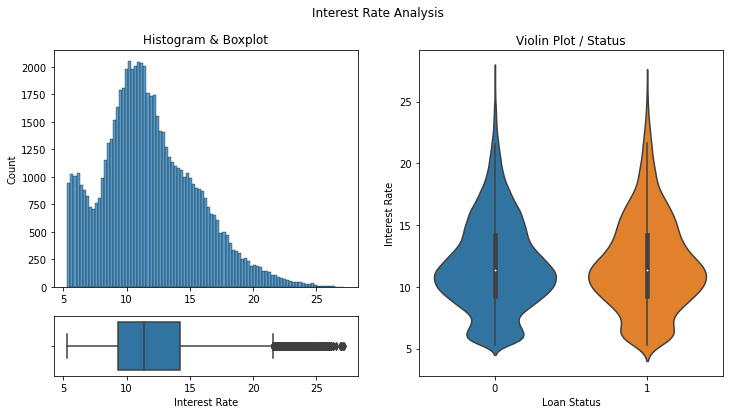

In [51]:
fig, axs = plt.subplot_mosaic("AC;BC", gridspec_kw=dict(height_ratios=[4,1]), figsize=(12,6))

fig.suptitle("Interest Rate Analysis")

sns.histplot(x=df["Interest Rate"], ax=axs["A"]).set(title="Histogram & Boxplot", xlabel=None)

sns.boxplot(x=df["Interest Rate"], ax=axs["B"])
axs["B"].get_shared_x_axes().join(axs["A"], axs["B"])

sns.violinplot(x=df["Loan Status"], y=df["Interest Rate"], ax=axs["C"]).set(title="Violin Plot / Status")

Grade. Se nota en el hitograma una asimetría hacia la derecha, siendo la categoría C la más repetida. Las proporciones de créditos defaulteados es bastante constante entre todas las categorías. El monto de préstamo promedio es similar en todas las categorías, resalta apenas la categoría B con montos un poco más altos, y se nota también la mayor dispersión en la categoría G. Sorprendentemente no se notan diferencias importantes en las tasas de interés entre las categorías.

[Text(0.5, 1.0, 'Interest Rates by Grade')]

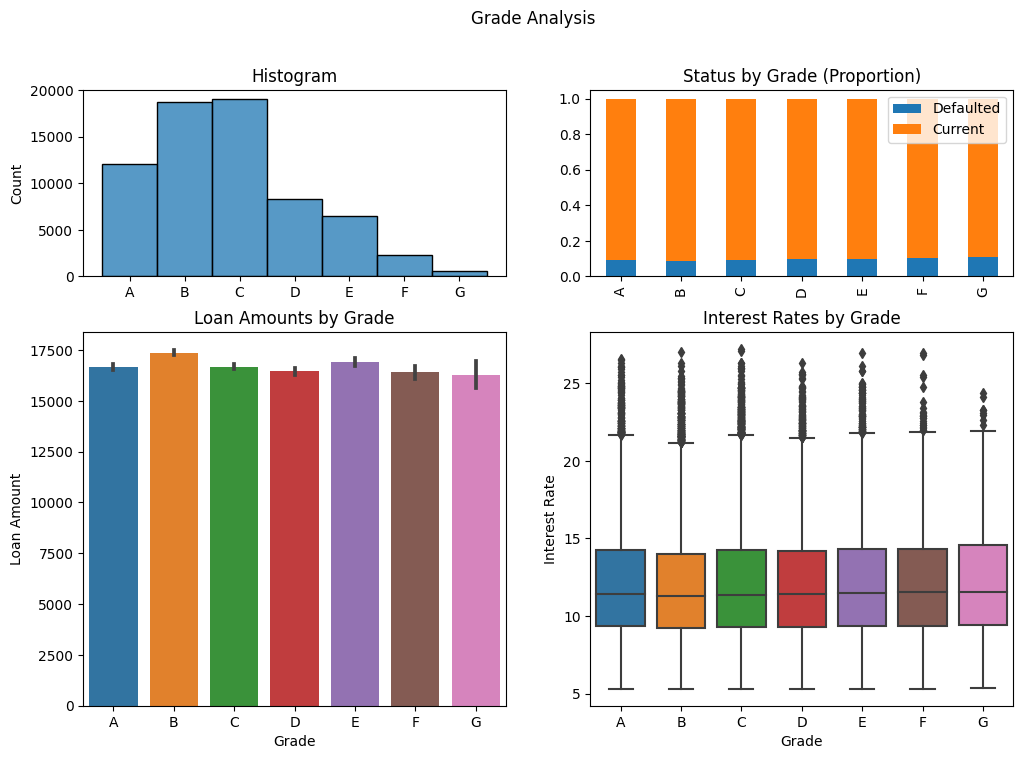

In [88]:
grades= (df["Grade"].sort_values().unique())
grade_status = list()

for i in grades:
    grade_status.append([
    len(df.loc[(df["Loan Status"]==1) & (df["Grade"] ==i)]) / len(df.loc[(df["Grade"] ==i)]), 
    len(df.loc[(df["Loan Status"]==0) & (df["Grade"] ==i)]) / len(df.loc[(df["Grade"] ==i)])
    ])

grade_status= pd.DataFrame(grade_status, index=grades, columns=["Defaulted", "Current"])


fig, axs = plt.subplots(nrows=2, ncols=2, gridspec_kw=dict(height_ratios=[1,2]), figsize=(12,8))

fig.suptitle("Grade Analysis")

sns.histplot(x=df["Grade"].sort_values(), ax=axs[0,0]).set(title="Histogram", xlabel=None)
grade_status.plot(kind="bar", stacked=True, ax=axs[0,1]).set(title="Status by Grade (Proportion)")
sns.barplot(y=df["Loan Amount"], x=df["Grade"].sort_values(), ax=axs[1,0], orient="v").set(title="Loan Amounts by Grade")
sns.boxplot(y=df["Interest Rate"], x=df["Grade"].sort_values(), ax=axs[1,1], orient="v").set(title="Interest Rates by Grade")

Subgrade. Repitiendo el análisis anterior en las subcategorías, se obtienen las mismas observaciones con mayor detalle. En la proporción de defaults destaca apenas al alza la subcategoría G3. Respecto a los montos, se nota cómo crece la dispersión a medida que baja la subcategoría y sorprende el comportamiento de  G4 con montos más bajos que el resto. En el análisis de las tasas, no se notan diferencias significativas entre las subcategorías.

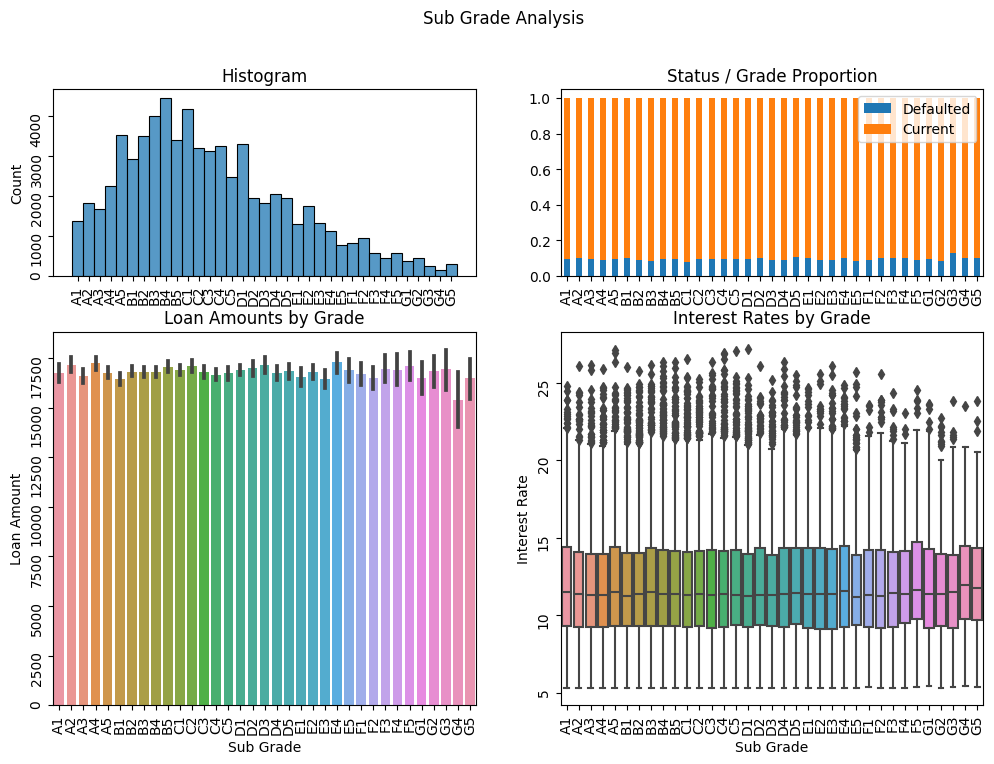

In [87]:
subgrades= (df["Sub Grade"].sort_values().unique())
subgrade_status = list()

for i in subgrades:
    subgrade_status.append([
    len(df.loc[(df["Loan Status"]==1) & (df["Sub Grade"] ==i)]) / len(df.loc[(df["Sub Grade"] ==i)]), 
    len(df.loc[(df["Loan Status"]==0) & (df["Sub Grade"] ==i)]) / len(df.loc[(df["Sub Grade"] ==i)])
    ])

subgrade_status= pd.DataFrame(subgrade_status, index=subgrades, columns=["Defaulted", "Current"])


fig, axs = plt.subplots(nrows=2, ncols=2, gridspec_kw=dict(height_ratios=[1,2]), figsize=(12,8))


fig.suptitle("Sub Grade Analysis")

sns.histplot(x=df["Sub Grade"].sort_values(), ax=axs[0,0]).set(title="Histogram", xlabel=None)
axs[0,0].tick_params(labelrotation=90)
subgrade_status.plot(kind="bar", stacked=True, ax=axs[0,1]).set(title="Status / Grade Proportion")
sns.barplot(y=df["Loan Amount"], x=df["Sub Grade"].sort_values(), ax=axs[1,0], orient="v").set(title="Loan Amounts by Grade")
axs[1,0].tick_params(labelrotation=90)
sns.boxplot(y=df["Interest Rate"], x=df["Sub Grade"].sort_values(), ax=axs[1,1], orient="v").set(title="Interest Rates by Grade")
axs[1,1].tick_params(labelrotation=90)